In [ ]:
import pandas as pd
import numpy as np
from google.colab import drive
drive.mount('/gdrive')
root = '/gdrive/MyDrive/داده کاوی/'


Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [ ]:
AB_NCY = pd.read_csv(root + "AB_NYC_2019.csv")



In [ ]:
AB_NCY.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [ ]:
AB_NCY.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [ ]:
AB_NCY.shape

(48895, 16)

In [ ]:
AB_NCY.nunique()

id                                48895
name                              47905
host_id                           37457
host_name                         11452
neighbourhood_group                   5
neighbourhood                       221
latitude                          19048
longitude                         14718
room_type                             3
price                               674
minimum_nights                      109
number_of_reviews                   394
last_review                        1764
reviews_per_month                   937
calculated_host_listings_count       47
availability_365                    366
dtype: int64

In [ ]:
AB_NCY['neighbourhood_group'].value_counts()

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64

In [ ]:
AB_NCY['neighbourhood'].value_counts()

Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
                      ... 
Fort Wadsworth           1
Richmondtown             1
New Dorp                 1
Rossville                1
Willowbrook              1
Name: neighbourhood, Length: 221, dtype: int64

In [ ]:
def sparse_data(AB_NCY):
    neighborhood_count = AB_NCY['neighbourhood'].value_counts()
    AB_NCY['neighbourhood'] = np.where(AB_NCY['neighbourhood'].isin(neighborhood_count.index[neighborhood_count >= 30]), AB_NCY['neighbourhood'],'Other')
    
    return AB_NCY

In [ ]:
AB_NCY['neighbourhood'].value_counts()

Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
                      ... 
Fort Wadsworth           1
Richmondtown             1
New Dorp                 1
Rossville                1
Willowbrook              1
Name: neighbourhood, Length: 221, dtype: int64

In [ ]:
AB_NCY['host_name'].value_counts()

Michael              417
David                403
Sonder (NYC)         327
John                 294
Alex                 279
                    ... 
Rhonycs                1
Brandy-Courtney        1
Shanthony              1
Aurore And Jamila      1
Ilgar & Aysel          1
Name: host_name, Length: 11452, dtype: int64

In [ ]:
AB_NCY['neighbourhood'].value_counts().tail(10).index

Index(['Howland Hook', 'Lighthouse Hill', 'Silver Lake', 'West Farms',
       'Woodrow', 'Fort Wadsworth', 'Richmondtown', 'New Dorp', 'Rossville',
       'Willowbrook'],
      dtype='object')

In [ ]:
AB_NCY['room_type'].value_counts()

Entire home/apt    25409
Private room       22326
Shared room         1160
Name: room_type, dtype: int64

In [ ]:
AB_NCY['id']

0            2539
1            2595
2            3647
3            3831
4            5022
           ...   
48890    36484665
48891    36485057
48892    36485431
48893    36485609
48894    36487245
Name: id, Length: 48895, dtype: int64

In [ ]:
AB_NCY.index.sort_values

<bound method Index.sort_values of RangeIndex(start=0, stop=48895, step=1)>

In [ ]:
AB_NCY.shape

(48895, 16)

In [ ]:
AB_NCY.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [ ]:
AB_NCY['price']

0        149
1        225
2        150
3         89
4         80
        ... 
48890     70
48891     40
48892    115
48893     55
48894     90
Name: price, Length: 48895, dtype: int64

In [ ]:
AB_NCY.drop(columns='id',inplace=True)

In [ ]:
AB_NCY.columns

Index(['name', 'host_id', 'host_name', 'neighbourhood_group', 'neighbourhood',
       'latitude', 'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'last_review', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')

In [ ]:
AB_NCY.describe()

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [ ]:
AB_NCY.isna()

,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False
48891,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False
48892,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False
48893,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False


In [ ]:
AB_NCY.isna().sum()/len(AB_NCY)

name                              0.000327
host_id                           0.000000
host_name                         0.000429
neighbourhood_group               0.000000
neighbourhood                     0.000000
latitude                          0.000000
longitude                         0.000000
room_type                         0.000000
price                             0.000000
minimum_nights                    0.000000
number_of_reviews                 0.000000
last_review                       0.205583
reviews_per_month                 0.205583
calculated_host_listings_count    0.000000
availability_365                  0.000000
dtype: float64

In [ ]:
AB_NCY.isna().sum()/len(AB_NCY)> 0.50

name                              False
host_id                           False
host_name                         False
neighbourhood_group               False
neighbourhood                     False
latitude                          False
longitude                         False
room_type                         False
price                             False
minimum_nights                    False
number_of_reviews                 False
last_review                       False
reviews_per_month                 False
calculated_host_listings_count    False
availability_365                  False
dtype: bool

In [ ]:
AB_NCY.shape

(48895, 15)

In [ ]:
AB_NCY.columns[AB_NCY.isna().sum()/len(AB_NCY)> 0.50]

Index([], dtype='object')

In [ ]:
AB_NCY.columns[AB_NCY.isna().sum()/len(AB_NCY)> 0.20]

Index(['last_review', 'reviews_per_month'], dtype='object')

In [ ]:
AB_NCY['reviews_per_month'].mean()

1.3732214298586884

In [ ]:
AB_NCY['reviews_per_month'].fillna(AB_NCY['reviews_per_month'].mean(),inplace=True)

In [ ]:
AB_NCY['reviews_per_month'].isna().sum()/len(AB_NCY)

0.0

In [ ]:
AB_NCY.dtypes

name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [ ]:
AB_NCY['last_review'].mode()

0    2019-06-23
dtype: object

In [ ]:
AB_NCY['last_review']

0        2018-10-19
1        2019-05-21
2               NaN
3        2019-07-05
4        2018-11-19
            ...    
48890           NaN
48891           NaN
48892           NaN
48893           NaN
48894           NaN
Name: last_review, Length: 48895, dtype: object

In [ ]:
AB_NCY['last_review'].mode()

0    2019-06-23
dtype: object

In [ ]:
AB_NCY['last_review'].mode()

0    2019-06-23
dtype: object

In [ ]:
AB_NCY['last_review'].fillna('2019-06-23')

0        2018-10-19
1        2019-05-21
2        2019-06-23
3        2019-07-05
4        2018-11-19
            ...    
48890    2019-06-23
48891    2019-06-23
48892    2019-06-23
48893    2019-06-23
48894    2019-06-23
Name: last_review, Length: 48895, dtype: object

In [ ]:
AB_NCY.shape

(48895, 15)

In [ ]:
AB_NCY.isnull().sum()

name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                     0
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [ ]:
AB_NCY['name'] = AB_NCY['name'].fillna('Unknown')
AB_NCY['host_name'] = AB_NCY['host_name'].fillna('Unknown')


In [ ]:
AB_NCY['name'].isna().sum()/len(AB_NCY)


0.0

In [ ]:
AB_NCY['host_name'].isna().sum()/len(AB_NCY)


0.0

In [ ]:
AB_NCY.head()

,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.210000,6,365
1,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.380000,2,355
2,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,1.373221,1,365
3,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.640000,1,194
4,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.100000,1,0


In [ ]:
for columns in AB_NCY.columns:
    if AB_NCY[columns].dtypes == 'int64' or AB_NCY[columns].dtypes == 'float64' :
       upper_range = AB_NCY[columns].mean() + 3 * AB_NCY[columns].std()
       lower_range = AB_NCY[columns].mean() - 3 * AB_NCY[columns].std()

       out_1 = AB_NCY[(AB_NCY[columns]> upper_range)|(AB_NCY[columns]<lower_range)].index
       AB_NCY = AB_NCY.drop(out_1)


In [ ]:
AB_NCY.shape

(44129, 15)

In [ ]:
AB_NCY.dtypes

name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [ ]:
columns = []
for col in AB_NCY.columns:
    if AB_NCY[col].dtype == 'object':
      columns.append(col)
columns      

['name',
 'host_name',
 'neighbourhood_group',
 'neighbourhood',
 'room_type',
 'last_review']

In [ ]:
dummies_feature = pd.get_dummies(AB_NCY['room_type'])
dummies_feature.head()

,Entire home/apt,Private room,Shared room
0,0,1,0
1,1,0,0
2,0,1,0
4,1,0,0
5,1,0,0


In [ ]:
AB_NCY=pd.concat([AB_NCY,dummies_feature],axis=1)
AB_NCY.head()

,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,Entire home/apt,Private room,Shared room
0,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.210000,6,365,0,1,0
1,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.380000,2,355,1,0,0
2,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,1.373221,1,365,0,1,0
4,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.100000,1,0,1,0,0
5,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.590000,1,129,1,0,0


In [ ]:
AB_NCY.head()

,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,Entire home/apt,Private room,Shared room
0,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.210000,6,365,0,1,0
1,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.380000,2,355,1,0,0
2,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,1.373221,1,365,0,1,0
4,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.100000,1,0,1,0,0
5,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.590000,1,129,1,0,0


In [ ]:
AB_NCY.drop(columns='room_type',inplace=True)



In [ ]:
#dummies_feature = pd.get_dummies(AB_NCY['neighbourhood_group_new'])
#dummies_feature.head()

In [ ]:
AB_NCY.shape

(44129, 14)

In [ ]:
#AB_NCY = pd.concat([AB_NCY,dummies_feature],axis=1)
#AB_NCY.head()

In [ ]:
#AB_NCY.drop(columns='neighbourhood_group_new',inplace=True)


In [ ]:
AB_NCY.shape

(44129, 14)

In [ ]:
dummies_feature = pd.get_dummies(AB_NCY['neighbourhood'])
dummies_feature.head()

,Allerton,Arrochar,Astoria,Bath Beach,Battery Park City,Bay Ridge,Baychester,Bedford-Stuyvesant,Belle Harbor,Belmont,...,West Farms,West Village,Westchester Square,Whitestone,Williamsbridge,Williamsburg,Windsor Terrace,Woodhaven,Woodlawn,Woodside
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
AB_NCY = pd.concat([AB_NCY,dummies_feature],axis=1)
AB_NCY.head()

,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,price,minimum_nights,number_of_reviews,...,West Farms,West Village,Westchester Square,Whitestone,Williamsbridge,Williamsburg,Windsor Terrace,Woodhaven,Woodlawn,Woodside
0,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,149,1,9,...,0,0,0,0,0,0,0,0,0,0
1,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,225,1,45,...,0,0,0,0,0,0,0,0,0,0
2,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,150,3,0,...,0,0,0,0,0,0,0,0,0,0
4,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,80,10,9,...,0,0,0,0,0,0,0,0,0,0
5,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,200,3,74,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
AB_NCY.drop(columns='neighbourhood',inplace=True)


In [ ]:
AB_NCY.drop(columns='host_name',inplace=True)


In [ ]:
AB_NCY.drop(columns='name',inplace=True)


In [ ]:
AB_NCY.drop(columns='last_review',inplace=True)


In [ ]:
AB_NCY.shape

(44129, 178)

In [ ]:
AB_NCY.columns

Index(['host_id', 'neighbourhood_group', 'latitude', 'longitude', 'price',
       'minimum_nights', 'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365',
       ...
       'West Farms', 'West Village', 'Westchester Square', 'Whitestone',
       'Williamsbridge', 'Williamsburg', 'Windsor Terrace', 'Woodhaven',
       'Woodlawn', 'Woodside'],
      dtype='object', length=178)

In [ ]:
y = AB_NCY['price']
x = AB_NCY.drop(columns = ['price'])
print(x.shape)
print(y.shape)

(44129, 177)
(44129,)


In [ ]:
AB_NCY.dtypes

host_id                  int64
neighbourhood_group     object
latitude               float64
longitude              float64
price                    int64
                        ...   
Williamsburg             uint8
Windsor Terrace          uint8
Woodhaven                uint8
Woodlawn                 uint8
Woodside                 uint8
Length: 178, dtype: object

In [ ]:
#from sklearn.decomposition import PCA
#pca = PCA(0.90)
#x_pca = pca.fit_transform(x)


In [ ]:
#x_pca.shape

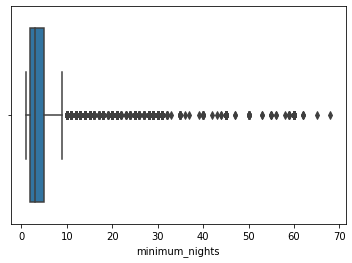

In [ ]:
import seaborn as sns
sns.boxplot(x=AB_NCY['minimum_nights'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


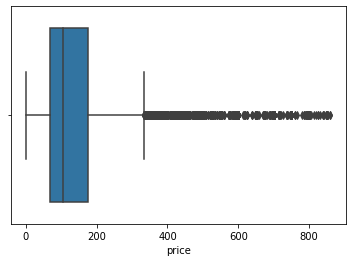

In [ ]:
import seaborn as sns
sns.boxplot(AB_NCY['price'])

In [ ]:
AB_NCY['neighbourhood_group']

0         Brooklyn
1        Manhattan
2        Manhattan
4        Manhattan
5        Manhattan
           ...    
48890     Brooklyn
48891     Brooklyn
48892    Manhattan
48893    Manhattan
48894    Manhattan
Name: neighbourhood_group, Length: 44129, dtype: object

In [ ]:
neighbourhood_group_new_price = AB_NCY.groupby(['neighbourhood_group']).describe()['price']
neighbourhood_group_new_price

,count,mean,std,min,25%,50%,75%,max
neighbourhood_group,,,,,,,,
Bronx,956.0,84.188285,73.329266,0.0,45.0,65.0,99.0,800.0
Brooklyn,19069.0,116.761707,89.276072,0.0,60.0,90.0,150.0,860.0
Manhattan,19654.0,172.985499,121.947942,0.0,93.0,145.0,202.0,860.0
Queens,4282.0,93.523821,66.365959,10.0,50.0,75.0,110.0,700.0
Staten Island,168.0,99.154762,95.034125,29.0,49.0,75.0,110.0,800.0


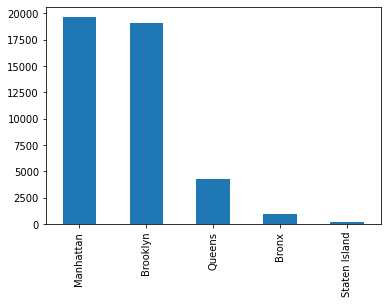

In [ ]:
import matplotlib.pyplot as plt

AB_NCY['neighbourhood_group'].value_counts().plot(kind='bar')

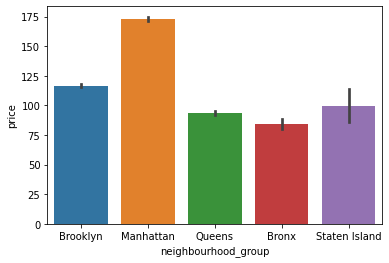

In [ ]:
import seaborn as sns
from IPython.display import Image
from matplotlib import pyplot as plt
import seaborn as sns
sns.barplot(x=AB_NCY['neighbourhood_group'],y=AB_NCY['price'])

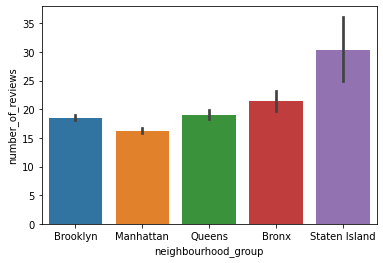

In [ ]:
sns.barplot(x=AB_NCY['neighbourhood_group'],y=AB_NCY['number_of_reviews'])

In [ ]:
AB_NCY[['neighbourhood_group','number_of_reviews']].groupby(AB_NCY['neighbourhood_group']).mean()

,number_of_reviews
neighbourhood_group,
Bronx,21.446653
Brooklyn,18.528292
Manhattan,16.304976
Queens,19.057917
Staten Island,30.357143


In [ ]:
most_active_host = AB_NCY['host_id'].value_counts().head(10).index

In [ ]:
most_active_host[5:]

Int64Index([200380610, 7503643, 1475015, 120762452, 2856748], dtype='int64')

In [ ]:
host_airbnbs = AB_NCY[AB_NCY['host_id'].isin(most_active_host)]

In [ ]:
host_airbnbs.head()

,host_id,neighbourhood_group,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,...,West Farms,West Village,Westchester Square,Whitestone,Williamsbridge,Williamsburg,Windsor Terrace,Woodhaven,Woodlawn,Woodside
1386,1475015,Manhattan,40.71655,-74.01171,130,30,2,0.03,52,116,...,0,0,0,0,0,0,0,0,0,0
1454,1475015,Manhattan,40.75743,-73.96939,90,30,3,0.05,52,358,...,0,0,0,0,0,0,0,0,0,0
1455,1475015,Manhattan,40.74190,-73.98160,100,30,2,0.04,52,342,...,0,0,0,0,0,0,0,0,0,0
1456,1475015,Manhattan,40.76758,-73.98722,85,30,2,0.04,52,223,...,0,0,0,0,0,0,0,0,0,0
1457,1475015,Manhattan,40.74189,-73.97833,87,30,3,0.05,52,363,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
top_host = AB_NCY.host_id.value_counts()
top_host_df = pd.DataFrame(top_host)
top_host_df.reset_index(inplace = True)
top_host_df.rename(columns = {'index':'Host_ID','host_id':'P_Count'}, inplace = True)
top_host_df['Total Percent of Place'] = top_host_df.P_Count/len(AB_NCY.host_id)
top_host_df['Cumulative_Percent'] = top_host_df['Total Percent of Place'].cumsum()
top_host_df

,Host_ID,P_Count,Total Percent of Place,Cumulative_Percent
0,137358866,103,0.002334,0.002334
1,16098958,96,0.002175,0.004510
2,12243051,96,0.002175,0.006685
3,61391963,91,0.002062,0.008747
4,22541573,87,0.001971,0.010719
...,...,...,...,...
34836,69890625,1,0.000023,0.999909
34837,545273,1,0.000023,0.999932
34838,7609268,1,0.000023,0.999955
34839,30789837,1,0.000023,0.999977


In [ ]:
#3pearson_corr = AB_NCY.corr(method='pearson')
#sns.heatmap(pearson_corr, annot =True)
#plt.title("Pearson's Correlation (Linear Relationship) For Numerical Variables")
#plt.show()

In [ ]:
#from matplotlib import pyplot as plt
#plt.bar(x=neighbourhood_group_new, y=AB_NCY['price'], color="red")

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


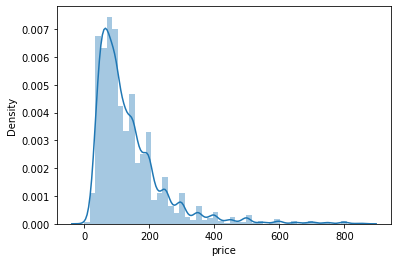

In [ ]:
import seaborn as sns
sns.distplot(AB_NCY['price'])

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt


In [ ]:
#import seaborn as sns
#import matplotlib.pyplot as plt

#corr = AB_NCY.corr()
#f ,ax = plt.subplots(figsize=(10,5))
#sns.heatmap(corr, square=True, annot=True)


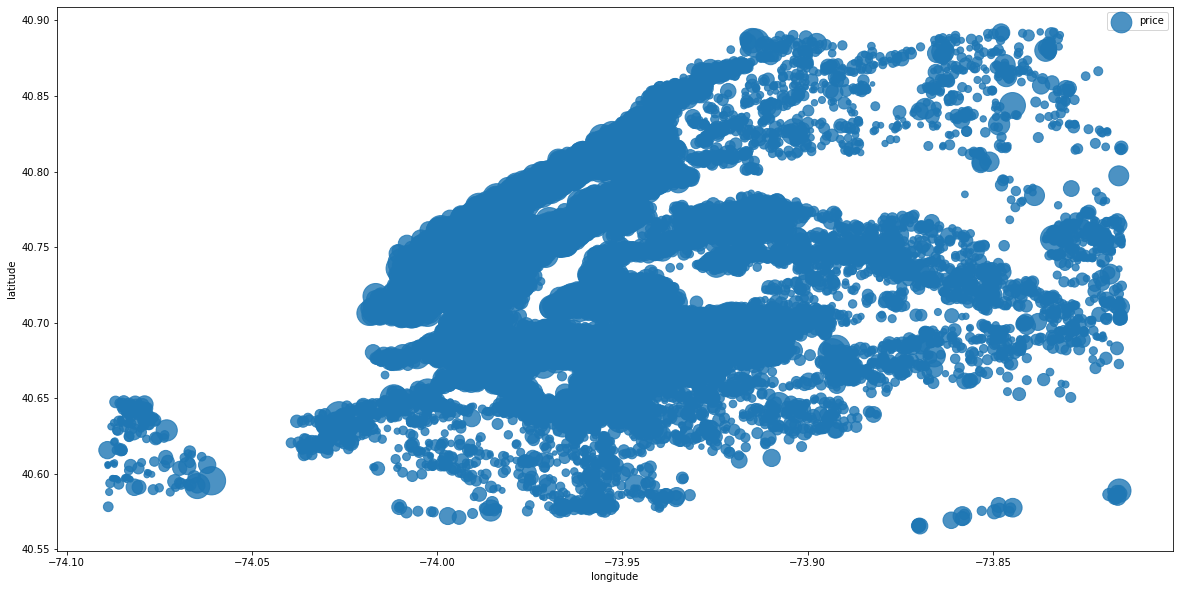

In [ ]:
AB_NCY.plot(kind="scatter", x="longitude", y="latitude", figsize=(20,10), s = AB_NCY["price"] , label="price",
          alpha=0.8)


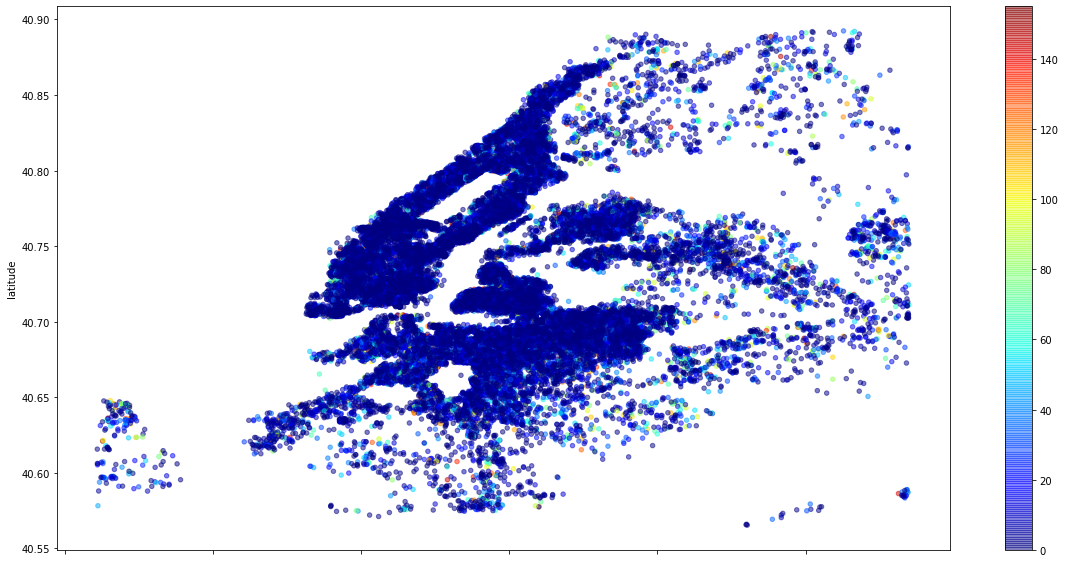

In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
AB_NCY.plot(kind="scatter", x="longitude", y="latitude", figsize=(20,10), 
          alpha=0.5, c=AB_NCY["number_of_reviews"], cmap=plt.get_cmap("jet"))

In [ ]:
AB_NCY['minimum_nights']

0         1
1         1
2         3
4        10
5         3
         ..
48890     2
48891     4
48892    10
48893     1
48894     7
Name: minimum_nights, Length: 44129, dtype: int64

In [ ]:
AB_NCY['price'].mean()

138.7748872623445

In [ ]:

from scipy import stats
AB_NCY[['price','minimum_nights']].describe()
ttest,pval = stats.ttest_rel(AB_NCY['price'], AB_NCY['minimum_nights'])
print(pval)
if pval<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

0.0
reject null hypothesis


In [ ]:

from scipy import stats
from statsmodels.stats import weightstats as stests
ztest ,pval = stests.ztest(AB_NCY['price'], x2=None, value=156)
print(float(pval))
if pval<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

1.6571332585009456e-246
reject null hypothesis


In [ ]:

contingency_table=pd.crosstab(AB_NCY["price"],AB_NCY["number_of_reviews"])
print('contingency_table :-\n',contingency_table)
#Observed Values
Observed_Values = contingency_table.values 
print("Observed Values :-\n",Observed_Values)
b=stats.chi2_contingency(contingency_table)
Expected_Values = b[3]
print("Expected Values :-\n",Expected_Values)
no_of_rows=len(contingency_table.iloc[0:2,0])
no_of_columns=len(contingency_table.iloc[0,0:2])
ddof=(no_of_rows-1)*(no_of_columns-1)
print("Degree of Freedom:-",ddof)
alpha = 0.05
from scipy.stats import chi2
chi_square=sum([(o-e)**2./e for o,e in zip(Observed_Values,Expected_Values)])
chi_square_statistic=chi_square[0]+chi_square[1]
print("chi-square statistic:-",chi_square_statistic)
critical_value=chi2.ppf(q=1-alpha,df=ddof)
print('critical_value:',critical_value)
#p-value
p_value=1-chi2.cdf(x=chi_square_statistic,df=ddof)
print('p-value:',p_value)
print('Significance level: ',alpha)
print('Degree of Freedom: ',ddof)
print('chi-square statistic:',chi_square_statistic)
print('critical_value:',critical_value)
print('p-value:',p_value)
if chi_square_statistic>=critical_value:
    print("Reject H0,There is a relationship between 2 categorical variables")
else:
    print("Retain H0,There is no relationship between 2 categorical variables")
    
if p_value<=alpha:
    print("Reject H0,There is a relationship between 2 categorical variables")
else:
    print("Retain H0,There is no relationship between 2 categorical variables")

contingency_table :-
 number_of_reviews  0    1    2    3    4    5    6    7    8    9    ...  146  \
price                                                                ...        
0                    1    1    1    1    0    1    0    0    0    0  ...    0   
10                   5    0    4    0    1    1    0    0    0    0  ...    0   
11                   2    0    0    0    0    0    0    0    0    0  ...    0   
12                   2    0    0    0    0    0    0    0    1    0  ...    0   
15                   3    0    1    1    0    0    0    0    0    0  ...    0   
...                ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
840                  1    0    1    0    0    0    0    0    0    0  ...    0   
843                  0    0    0    0    1    0    0    0    0    0  ...    0   
848                  0    0    0    0    0    0    0    0    0    0  ...    0   
850                  7    0    0    1    1    0    0    1    0    0  ...    0   
860   

In [ ]:
for columns in AB_NCY.columns:
  if AB_NCY[columns].dtypes == 'int64' or AB_NCY[columns].dtypes == 'float64' :
      AB_NCY[columns]=((AB_NCY[columns]-AB_NCY[columns].mean())/(AB_NCY[columns].std()))

In [ ]:
columns = []
for cols in AB_NCY.columns:
    if AB_NCY[cols].dtype == 'object':
        columns.append(cols)
        
columns

['neighbourhood_group']

In [ ]:
AB_NCY.drop(['neighbourhood_group'],axis=1,inplace = True)


In [ ]:
columns = []
for cols in AB_NCY.columns:
    if AB_NCY[cols].dtype == 'object':
        columns.append(cols)
        
columns

[]

In [ ]:
columns = []
for cols in AB_NCY.columns:
    if AB_NCY[cols].dtype == 'bool':
        columns.append(cols)
        
columns

[]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=1)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import math
import pickle

prediction = []
def linearregression(xtrain, ytrain, xtest, ytest):
    linreg = LinearRegression()
    linreg.fit(xtrain, ytrain)
    y_pred = linreg.predict(xtest)
    
    #Saving the model
    Pkl_Filename = "LR_Model.pkl"  
    with open(Pkl_Filename, 'wb') as file:  
        pickle.dump(linreg, file)
        
    print('MAE:', metrics.mean_absolute_error(ytest, y_pred))
    print('MSE:', metrics.mean_squared_error(ytest, y_pred))
    print('R2_score:', metrics.r2_score(ytest, y_pred))
    plt.scatter(y_pred,ytest)
    plt.xlabel('predicted value of y')
    plt.ylabel('y')
    plt.figure()
linearregression(X_train, y_train, X_test, y_test)

ValueError: ignored